In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
import pickle

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

matplotlib.rcParams['figure.figsize'] = (17, 5)
matplotlib.rcParams['axes.grid'] = False
sns.set_style("whitegrid")


def mpl_inline(): 
    rc = plt.rcParams.copy()
    %matplotlib inline
    plt.rcParams.update(rc)
mpl_inline() #  A bug in IPython - does not pick up rcParams! (see https://github.com/jupyter/notebook/issues/3385)

Tensorflow Version: 2.9.1
Pandas Version: 1.4.4
Numpy Version: 1.22.4
System Version: 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [5]:
past_history = 240
future_target = 24
TL=past_history+future_target
# predictor index
PRED_INDEX=2 # 3rd column (RL) is what we want to predict

In [6]:
STEP=1
def create_time_steps(length):
    return list(range(-length, 0))

   
def multi_step_plot(history, true_future, prediction):
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), '--gh',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), '--rh',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()


def get_window(dataset,start,back, fwd, predictor_index):
    print(start-back, start,start,start+fwd )
    pd=dataset[start-back:start, :]
    fd=dataset[start:start+fwd, :]
    print(pd[0], pd[-1],fd[0],fd[-1])

    return pd, fd[:,predictor_index]

In [7]:
multi_step_model=tf.keras.models.load_model('model_good.keras')
with open("model_good.param","rb") as fp:
    data_mean, data_std = pickle.load(fp)
    print(f"Mean : {data_mean} and std : {data_std}")


Mean : [1.65992527e+04 9.38722222e-03 4.82136111e-01] and std : [1.57935832e+04 8.96885040e-01 5.87388456e-01]


290 530 530 554
[-0.78317842 -1.29268208 -0.1398327 ] [-0.8304081  -1.82786773 -0.48032287] [-0.83032454 -1.99511325 -0.93998461] [-0.82559562 -1.25923298 -0.03768564]


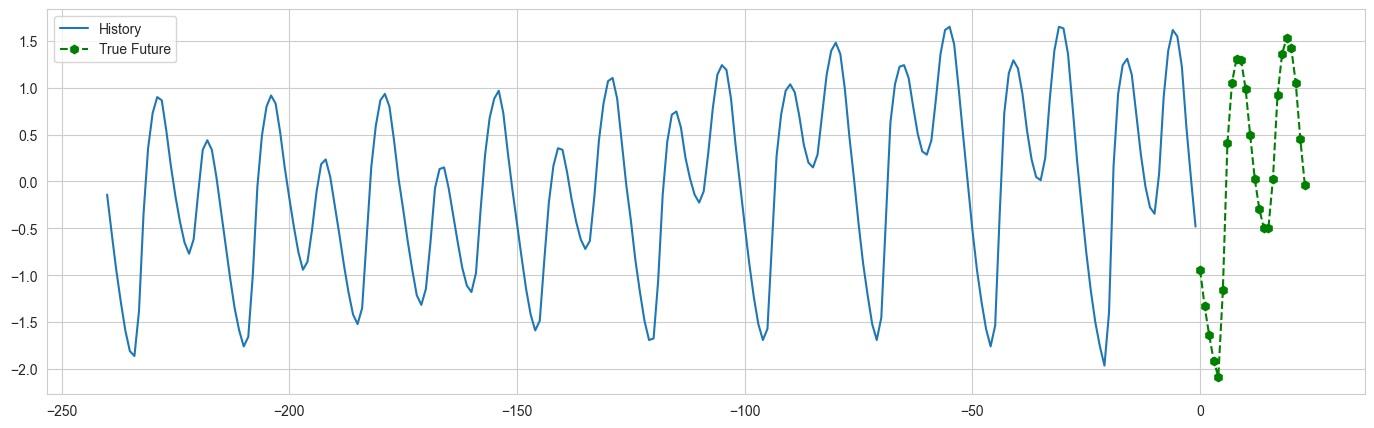

In [8]:
df = pd.read_csv('data.csv', index_col=0);
dataset_= df.values
dataset = (dataset_-data_mean)/data_std

x, y=get_window(dataset,530,past_history,future_target, PRED_INDEX)
multi_step_plot(x[:,PRED_INDEX], y, np.array([0]))


292 532 532 556
[-0.78375714 -1.76096952 -0.93998461] [-0.83022437 -2.09546055 -1.33154832] [-0.83010758 -1.41532879 -1.63798948] [-0.82520367 -1.91706534 -0.95700912]
1/1 [==============================] - 0s 391ms/step


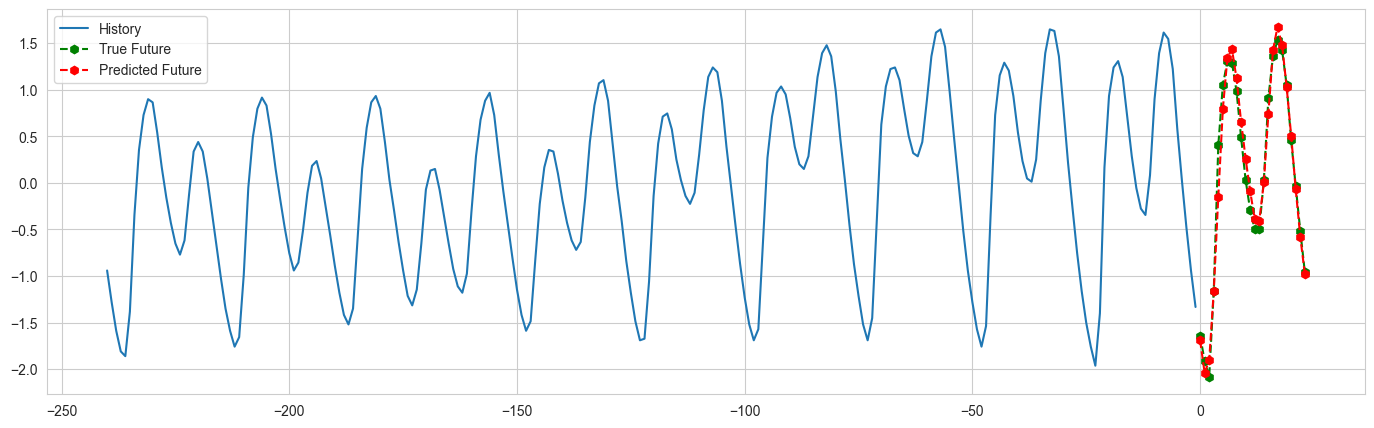

In [9]:
x, y=get_window(dataset,532,past_history,future_target, PRED_INDEX)
multi_step_plot(x[:,PRED_INDEX], y, multi_step_model.predict(np.array([x]))[0])

Now let us check some edge caeses (e.g. extremes)

In [13]:
maxv=dataset[:,PRED_INDEX].max()
idm=np.where(dataset == maxv)[0][0]
print(idm,maxv)

24284 2.49896618517317


24047 24287 24287 24311
[ 1.41086984 -0.14426288  1.05188293] [ 0.68440647 -0.51220302  2.00525543] [ 0.68300809 -1.05853836  1.52856918] [ 0.6449155  -0.20001139  2.10740248]
1/1 [==============================] - 0s 26ms/step


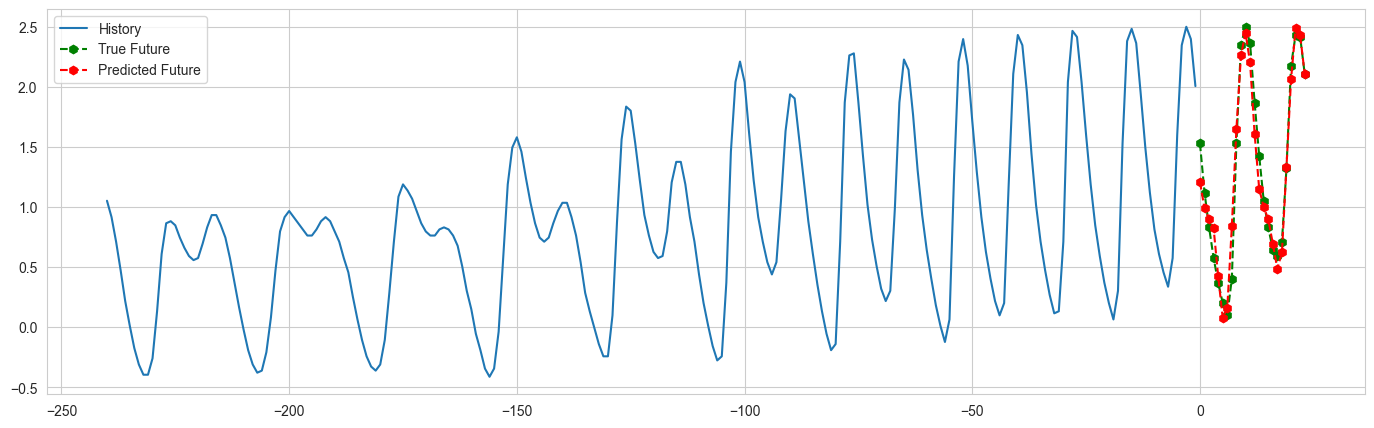

In [11]:
x, y=get_window(dataset,idm+3,past_history,future_target, PRED_INDEX)
multi_step_plot(x[:,PRED_INDEX], y, multi_step_model.predict(np.array([x]))[0])

23907 24147 24147 24171
[ 1.77527177  0.35747366 -0.08875917] [0.97201794 0.51356947 0.96676038] [0.96796382 0.15677904 1.03485842] [0.87693349 1.11565333 0.79651529]
1/1 [==============================] - 0s 57ms/step


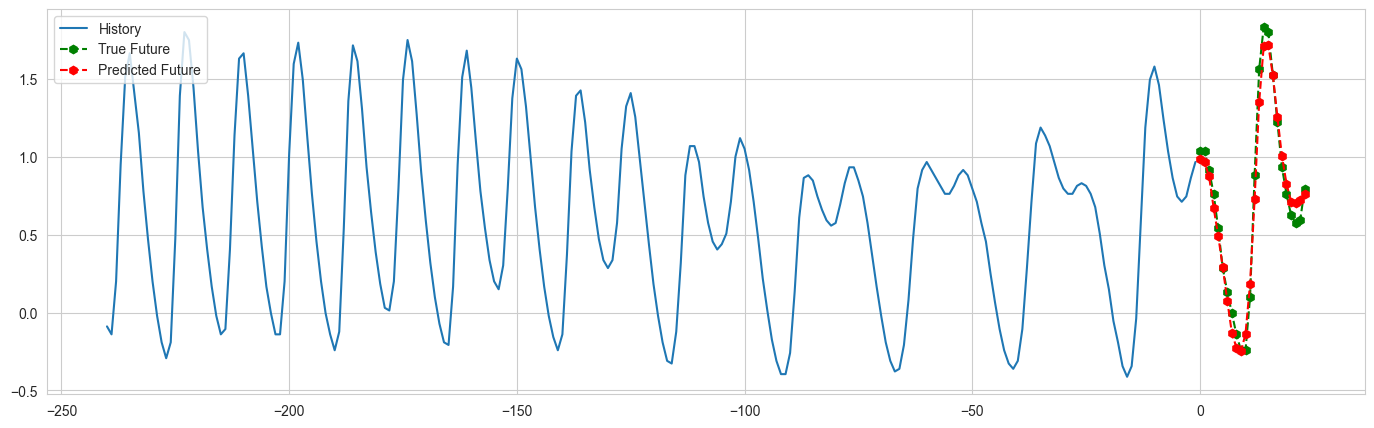

In [14]:
x, y=get_window(dataset,idm-137,past_history,future_target, PRED_INDEX)
multi_step_plot(x[:,PRED_INDEX], y, multi_step_model.predict(np.array([x]))[0])